In [ ]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
!unzip /content/fortnite.zip
%ls


unzip:  cannot find or open /content/fortnite.zip, /content/fortnite.zip.zip or /content/fortnite.zip.ZIP.
sample_data/


FileNotFoundError: [Errno 2] No such file or directory: '/content/fortnite/agent.jpeg'

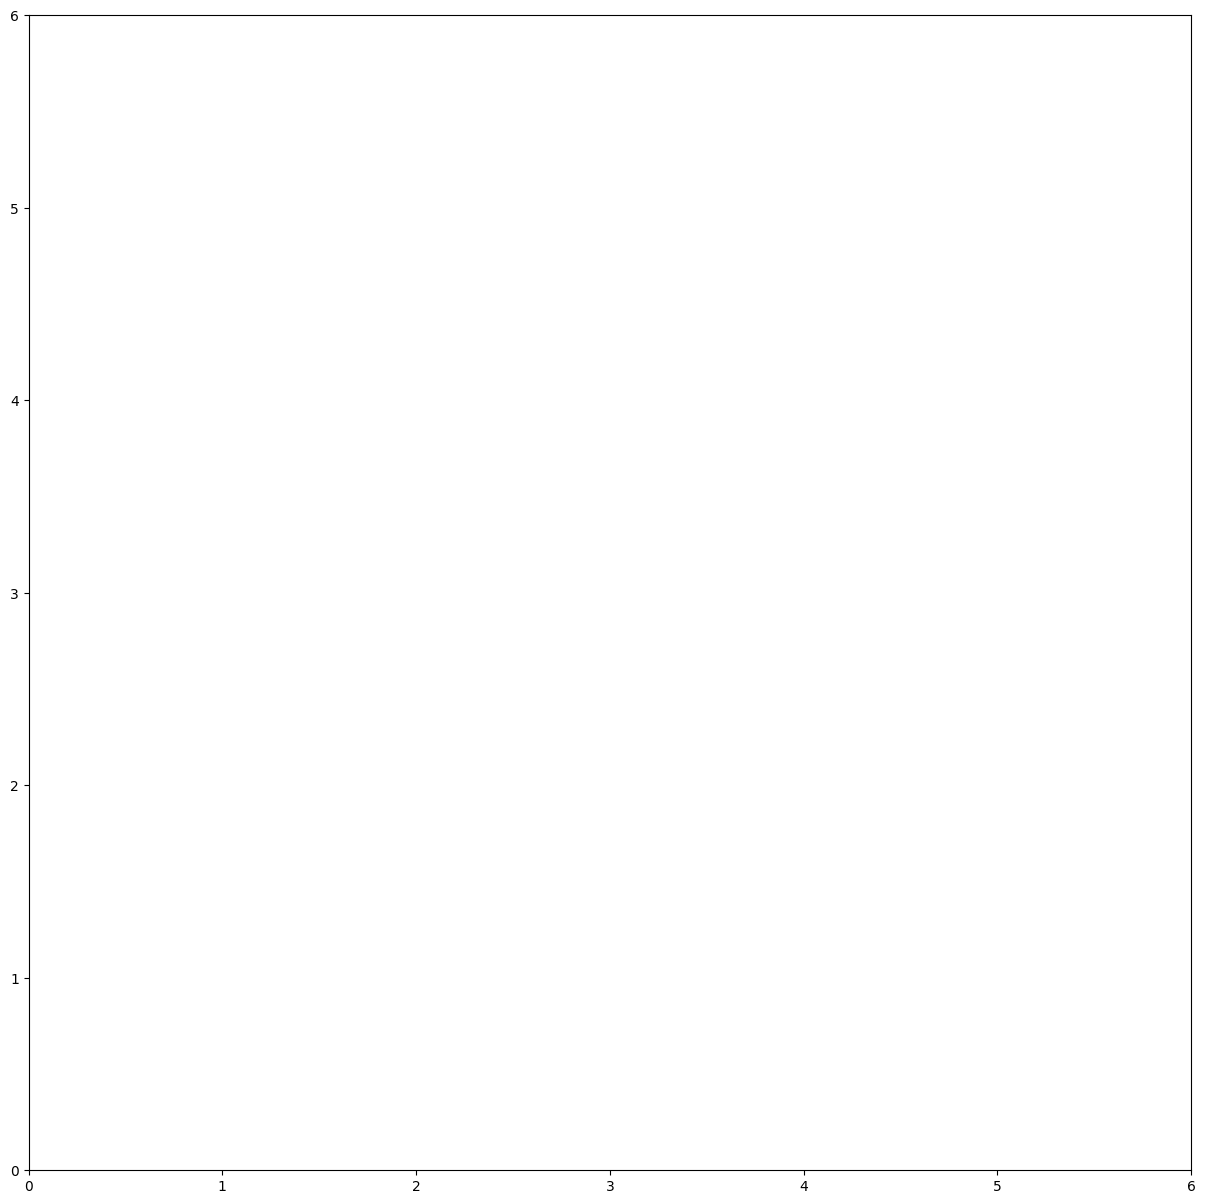

In [ ]:
# Imports
import cv2
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np


# Defining the Wumpus World Environment.
class env(gym.Env):
    def __init__(self, environment_type):
        self.envtype = environment_type
        self.environment_width = 6
        self.environment_height = 6
        self.obspace = spaces.Discrete(self.environment_width * self.environment_height)
        self.actionspace = spaces.Discrete(4)
        self.agent_pos = np.asarray([0, 0])
        self.breeze_pos = np.asarray([[0,2],[5,0]])
        self.gold_pos = np.asarray([5, 5])
        self.gold_quantity = 1
        self.goal_pos= np.asarray([5,5])
        self.goal_quantity=1
        self.max_timesteps=15
        self.timestep=10

        self.pit_pos = np.asarray([[3, 3],[2,1],[4,0]])


        self.pit_pos = np.asarray([[4, 1], [2, 1], [0, 4], [3, 5], [1, 5]])
        self.stench_pos = np.asarray([[3, 2], [2, 3], [4, 3], [3, 4]])
        self.wumpus_pos = np.asarray([3, 3])

    def reset(self):
        """This method resets the agent position and returns the state as the observation.

        :returns int observation: -  Integer representing the grid block the agent is in.
                 dict info: - A dictionary that can be used to provide additional implementation information."""
        self.state = np.zeros((6,6))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()

        info = {}

        return observation, info

    def step(self, action):
        """This method implements what happens when the agent takes a particular action. It changes the agent's
        position (While not allowing it to go out of the environment space.), maps the environment co-ordinates to a
        state, defines the rewards for the various states, and determines when the episode ends.

        :param int action: - Integer in the range 0 to 3 inclusive representing the different actions the agent can
        take.

        :returns arr observation: - Array representing the partial observation.
                 int reward: - Integer value that's used to measure the performance of the agent.
                 bool terminated: - Boolean describing whether the episode has ended.
                 bool truncated: Boolean describing whether a truncation condition outside the scope of the MDP is
                                 satisfied.
                 dict info: - A dictionary that can be used to provide additional implementation information."""

        # Describing the outcomes of the various possible actions.
        if action == 0:
            self.agent_pos[0] += 1  # This action causes the agent to go right.
        if action == 1:
            self.agent_pos[0] -= 1  # This action causes the agent to go left.
        if action == 2:
            self.agent_pos[1] += 1  # This action causes the agent to go up.
        if action == 3:
            self.agent_pos[1] -= 1  # This action causes the agent to go down.

        self.agent_pos = np.clip(self.agent_pos, 0, 2)


        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
          reward = 1

        self.timestep += 1

        # Condition to check for termination (episode is over)
        terminated = True if self.timestep >= self.max_timesteps else False

        # Condition to check if agent is traversing to a cell beyond the permitted cells
        # This helps the agent to learn how to behave in a safe and predictable manner
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False





        reward = 0
        rewardList=[[0,2],[0,4],[1,5],[2,1],[3,5],[4,1],[5,0],[2,3],[3,2],[3,3],[3,4],[4,3]]

        if self.state == [0,2]:
          reward+=1
        if self.state == [0,4]:
          reward+=2
        if self.state == [1,5]:
          reward+=2
        if self.state == [2,1]:
          reward+=2
        if self.state == [3,5]:
          reward+=2
        if self.state == [4,1]:
          reward+=2
        if self.state == [5,0]:
          reward+=1
        if self.state == [2,3]:
          reward-=1
        if self.state == [3,2]:
          reward-=1
        if self.state == [3,3]:
          reward-=2
        if self.state == [3,4]:
          reward-=1
        if self.state == [4,3]:
          reward-=1
        return


    def render(self, mode='human', plot=False):
        """This method renders the environment.

        :param str mode: 'human' renders to the current display or terminal and returns nothing.
        :param bool plot: Boolean indicating whether we show a plot or not. If False, the method returns a resized NumPy
                     array representation of the environment to be used as the state. If True it plots the environment.

        :returns arr preprocessed_image: Grayscale NumPy array representation of the environment."""

        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 6)

        def plot_image(plot_pos):
            """This is a helper function to render the environment. It checks which objects are in a particular
            position on the grid and renders the appropriate image.

            :param arr plot_pos: Co-ordinates of the grid position which needs to be rendered."""

            # Initially setting every object to not be plotted.
            plot_agent, plot_breeze, plot_gold, plot_pit, plot_stench, plot_wumpus = \
                False, False, False, False, False, False

            # Checking which objects need to be plotted by comparing their positions.
            if np.array_equal(self.agent_pos, plot_pos):
                plot_agent = True
            if any(np.array_equal(self.breeze_pos[i], plot_pos) for i in range(len(self.breeze_pos))):
                plot_breeze = True
            if self.gold_quantity > 0:  # Gold isn't plotted if it has already been picked by one of the agents.
                if np.array_equal(plot_pos, self.gold_pos):
                    plot_gold = True
            if any(np.array_equal(self.pit_pos[i], plot_pos) for i in range(len(self.pit_pos))):
                plot_pit = True
            if any(np.array_equal(self.stench_pos[i], plot_pos) for i in range(len(self.stench_pos))):
                plot_stench = True
            if np.array_equal(plot_pos, self.wumpus_pos):
                plot_wumpus = True

            #Plot for Agent.
            if plot_agent and \
                    all(not item for item in
                        [plot_breeze, plot_gold, plot_pit, plot_stench, plot_wumpus]):
                agent = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/agent.jpeg'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent)

            # Plot for Breeze.
            elif plot_breeze and \
                    all(not item for item in
                        [plot_agent, plot_gold, plot_pit, plot_stench, plot_wumpus]):
                breeze = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/medkit.jpeg'), zoom=0.28),
                                        np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(breeze)

            # Plot for Gold.
            elif plot_gold and \
                    all(not item for item in [plot_pit]):
                gold = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/chest.jpeg'), zoom=0.28),
                                      np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(gold)


            # Plot for Pit.
            elif plot_pit and \
                    all(not item for item in
                        [plot_breeze]):
                pit = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/llama.jpeg'), zoom=0.28),
                                     np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(pit)

            # # Plot for Stench.
            elif plot_stench and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_gold, plot_pit, plot_wumpus]):
                stench = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/stickbomb.jpeg'), zoom=0.28),
                                        np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(stench)

            # Plot for Wumpus.
            elif plot_wumpus and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_gold, plot_pit, plot_stench]):
                wumpus = AnnotationBbox(OffsetImage(plt.imread('/content/fortnite/anotherbomb.jpeg'), zoom=0.28),
                                        np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(wumpus)

        coordinates_state_mapping_2 = {}
        for j in range(self.environment_height * self.environment_width):
            coordinates_state_mapping_2[j] = np.asarray(
                [j % self.environment_width, int(np.floor(j / self.environment_width))])

        # Rendering the images for all states.
        for position in coordinates_state_mapping_2:
            plot_image(coordinates_state_mapping_2[position])

        plt.xticks([0, 1, 2, 3, 4, 5])
        plt.yticks([0, 1, 2, 3, 4, 5])
        plt.grid()

        if plot:  # Displaying the plot.
            plt.show()
        else:  # Returning the preprocessed image representation of the environment.
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
            width = 84
            height = 84
            dim = (width, height)
            # noinspection PyUnresolvedReferences
            preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            plt.show()
            return preprocessed_image


wumpus_world = env(environment_type='deterministic')
wumpus_world.reset()
wumpus_world.render(plot=True)
wumpus_world.step(0)

In [ ]:
class RandomAgent:

  def __init__(self, env):
      self.env = env
      self.observation_space = env.observation_space
      self.action_space = env.action_space


  def step(self, obs):
    epsilon=1
    if np.random.uniform(0, 1) < epsilon:
      action = self.env.action_space.sample()  # choose random action
    else:
      # choose greedy
      action = np.argmax(Q[obs, :])  # choose action with highest Qvalue; returns index(the action)
    return action


In [ ]:
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]
plt.figure(figsize=(15, 10))
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [ ]:
#Defining the different parameters
epsilon = 1 #start with 1 and slowly decrease to 0.01; min val=0.01
total_episodes = 15 #TUNED PARAMETER
max_steps = 100 #TUNED PARAMETER
alpha = 0.15 #btwn 0.1 - 0.2
gamma = 0.91#btwn 0.9 - 0.99 ;
Q = np.zeros((36,4),dtype=float)


#helper function to choose policy
def choose_action(state,epsilon):
    action=0 #initialize action var
    epsilon_list = []

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample() #choose random action
    else:
      #choose greedy
      action = np.argmax(Q[state, :]) #choose action with highest Qvalue; returns index(the action)
      epsilon_list.append(epsilon)
    return action

def update(state, next_state, reward, action, next_action):
    #predicted qvalue for current state-action pair
    curr_qval = Q[state, action]

    #target q value from eqn / this would change for qlearning
    target_qval = reward + gamma * Q[next_state, next_action]

    #full eq
    Q[state, action] = Q[state, action] + alpha * (target_qval - curr_qval)


total_rewards_per_ep = 0

def sarsa(grid, action):
  #initializing the reward
  reward = 0
  total_rewards = 0

  for episode in range(total_episodes):

    t = 0 #count var
    state = env.reset() #0s

    #take action a
    action = choose_action(state)

    while t < max_steps:

      #visualize the training
      env.render() #supposed to render the state we're on with the sarsa algorithm

      #make sure agent isn't going in a cycle

      next_state, reward, done, info = env.step(action)
      print('Action:', action, ', Reward:', reward, ', Done:', done)

      if done:
        print(state)
        return choose_action.epsilon_list
        return total_rewards_per_ep
        break

      next_action = choose_action(next_state,epsilon)


      #call the RL
      step = update(state, next_state, reward, action, next_action)
      print(step) #show state

      state = next_state
      action = next_action

      #updating our vars
      t+=1

      for x in self.reward_list:
        if env.agent_pos == x:
          total_rewards_per_ep+=self.reward
           #not sure if i should update this - check if this needs to be updated. Reward does not have to be updated until position is reached


      #if at the end of learning process


  # while not terminated:
  #   action = agent.step(obs)
  #   obs, reward, terminated, truncated, info = env.step(action)
  #   print('Action:', action, ', Reward:', reward, ', Done:', terminated)
  #   env.render()

In [ ]:
import numpy as np
import gym

# Defining the different parameters
epsilon = 1.0  # Start with 1 and slowly decrease to 0.01; min val=0.01
total_episodes = 15  # TUNED PARAMETER
max_steps = 100  # TUNED PARAMETER
alpha = 0.15  # btwn 0.1 - 0.2
gamma = 0.91  # btwn 0.9 - 0.99
Q = np.zeros((36, 4), dtype=float)  # Q-value table initialization

env = gym.make('Taxi-v3')  # Create the Taxi-v3 environment

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # choose random action
    else:
        return np.argmax(Q[state, :])  # choose action with the highest Q-value

def update(state, next_state, reward, action, next_action):
    curr_qval = Q[state, action]
    target_qval = reward + gamma * Q[next_state, next_action]
    Q[state, action] = Q[state, action] + alpha * (target_qval - curr_qval)

def sarsa():
    for episode in range(total_episodes):
        state = env.reset()
        total_rewards_per_ep = 0
        t = 0  # count var
        action = choose_action(state, epsilon)

        while t < max_steps:
            # ... (previous code remains unchanged) ...

            if done:
                break

        epsilon *= 0.99  # Decay epsilon value after each episode
        print("Episode:", episode + 1, "Total Reward:", total_rewards_per_ep)

    print("Training completed.")

# Run the SARSA algorithm
sarsa()

# Print the final Q-table
print("Final Q-table:")
print(Q)



In [ ]:
#initialize Qa,Qb,s
Q1 = np.zeros((36, 4), dtype=float)
Q2 = np.zeros((36, 4), dtype=float)



In [ ]:
if __name__ == '__main__':
  env = env()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  while not terminated:
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()